In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
movies_path = "popular_10000_movies_tmdb.csv"
movies_data = pd.read_csv(movies_path)

In [35]:
movies_data.head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.


In [36]:
print(movies_data.shape)
print(movies_data.dtypes)

(10000, 14)
id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
dtype: object


In [37]:
print(movies_data.select_dtypes(["object"]).nunique())

title                   9650
release_date            5877
genres                  2323
original_language         51
overview                9916
production_companies    7990
tagline                 7189
dtype: int64


In [38]:
movies_data.isnull().sum()

id                         0
title                      0
release_date              21
genres                     0
original_language          0
vote_average               0
vote_count                 0
popularity                 0
overview                  77
budget                     0
production_companies       0
revenue                    0
runtime                    0
tagline                 2759
dtype: int64

<Axes: xlabel='budget', ylabel='vote_average'>

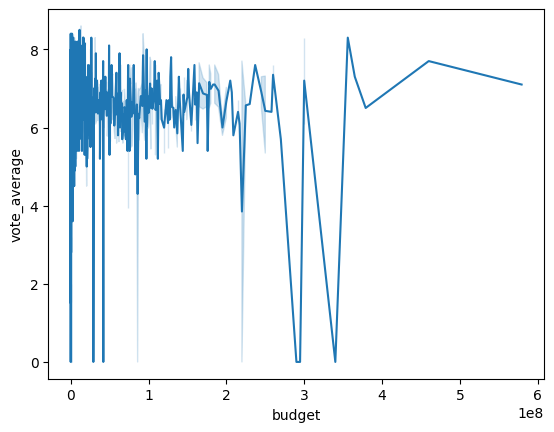

In [39]:
sns.lineplot(data = movies_data, x = "budget", y = "vote_average")

In [40]:
movies_data_no_mis_val_year = movies_data.dropna(subset="release_date")
movies_data_no_mis_val_year["release_year"] = movies_data_no_mis_val_year["release_date"].str.split("-").str[0].astype('int')
print(movies_data_no_mis_val_year.release_year.head())

0    2023
1    2023
2    2023
3    2023
4    2023
Name: release_year, dtype: int32


C:\Users\Userpc\AppData\Local\Temp\ipykernel_11232\1512917774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_no_mis_val_year["release_year"] = movies_data_no_mis_val_year["release_date"].str.split("-").str[0].astype('int')


In [41]:
print(movies_data["id"].nunique())

10000


The question I answered with this code: How many movies were released each year after the year 1999?

In [42]:
movies_data_no_mis_val_year["movies_each_year"] = movies_data_no_mis_val_year.groupby("release_year")["id"].transform('count')
unique_year_movies = movies_data_no_mis_val_year.drop_duplicates(subset="release_year")
unique_year_movies = unique_year_movies[unique_year_movies["release_year"] >= 2000]
unique_year_movies = unique_year_movies.sort_values(by="release_year", ascending=False)
print(unique_year_movies[["release_year", "movies_each_year"]])

      release_year  movies_each_year
4953          2028                 1
1714          2026                 1
1769          2025                 2
1610          2024                13
0             2023               444
5             2022               946
68            2021               632
86            2020               461
78            2019               478
123           2018               457
37            2017               430
176           2016               375
125           2015               330
83            2014               313
137           2013               287
175           2012               249
138           2011               255
269           2010               240
89            2009               253
394           2008               206
285           2007               219
482           2006               212
161           2005               186
165           2004               181
326           2003               153
262           2002               146
1

C:\Users\Userpc\AppData\Local\Temp\ipykernel_11232\3737793145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_no_mis_val_year["movies_each_year"] = movies_data_no_mis_val_year.groupby("release_year")["id"].transform('count')


(2000.0, 2023.0)

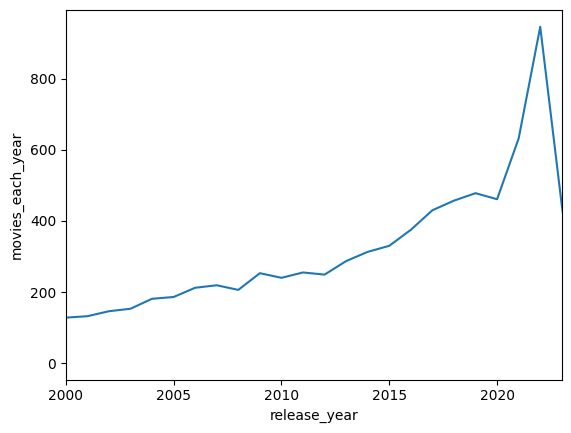

In [43]:
sns.lineplot(data=unique_year_movies, x = "release_year", y = "movies_each_year")
plt.xlim(2000, 2023)

The question I answered here: What is the average voting rate for movies each year after 1999?

In [50]:
average_rate_each_year = movies_data.copy()
average_rate_each_year = average_rate_each_year.dropna(subset="release_date")
average_rate_each_year["release_year"] = average_rate_each_year["release_date"].str.split("-").str[0].astype('int')
average_rate_each_year["average_rate_this_year"] = average_rate_each_year.groupby("release_year")["vote_average"].transform('mean')

unique_average_rate = average_rate_each_year.drop_duplicates(subset="release_year")
unique_average_rate = unique_average_rate.sort_values(by="release_year", ascending=False)
unique_average_rate = unique_average_rate[unique_average_rate["release_year"] >= 2000]
print(unique_average_rate])

      release_year  average_rate_this_year
4953          2028                0.000000
1714          2026                0.000000
1769          2025                0.000000
1610          2024                0.000000
0             2023                3.939640
5             2022                6.456871
68            2021                6.562184
86            2020                6.365293
78            2019                6.429289
123           2018                6.328884
37            2017                6.277907
176           2016                6.312267
125           2015                6.346667
83            2014                6.400958
137           2013                6.477352
175           2012                6.369478
138           2011                6.444706
269           2010                6.462500
89            2009                6.358498
394           2008                6.406311
285           2007                6.507306
482           2006                6.454717
161        

(2000.0, 2023.0)

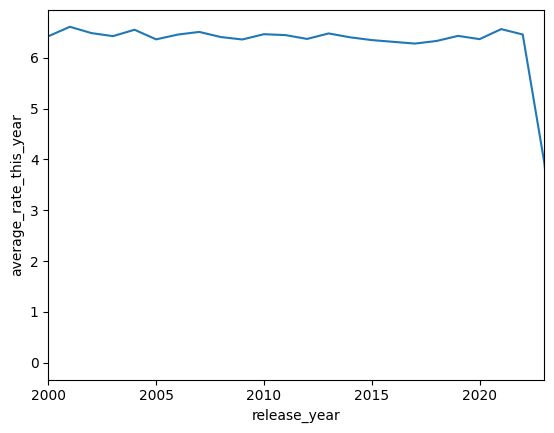

In [54]:
sns.lineplot(data=unique_average_rate, x = "release_year", y = "average_rate_this_year")
plt.xlim(2000, 2023)

The question I answered with this code: What was the most popular movie each year and its voting rate?

In [64]:
best_movie = movies_data.copy()
best_movie["release_date"].isnull().sum()
best_movie = best_movie.dropna(subset="release_date")
best_movie["release_year"] = best_movie["release_date"].str.split("-").str[0].astype(int)
best_movie["best_title"] = best_movie.groupby("release_year")["vote_average"].transform('max')
best_movie = best_movie.drop_duplicates(subset="release_year")
best_movie = best_movie[best_movie["release_year"] >= 2000]
best_movie = best_movie.sort_values(by="release_year")
print(best_movie[["release_year", "title", "best_title"]])

      release_year                                              title  \
162           2000                                 Dungeons & Dragons   
163           2001                                              Shrek   
262           2002            Harry Potter and the Chamber of Secrets   
326           2003  Pirates of the Caribbean: The Curse of the Bla...   
165           2004                            Zatch Bell! 101st Devil   
161           2005  The Chronicles of Narnia: The Lion, the Witch ...   
482           2006         Pirates of the Caribbean: Dead Man's Chest   
285           2007          Harry Potter and the Order of the Phoenix   
394           2008                                           Twilight   
89            2009           The Forbidden Legend: Sex & Chopsticks 2   
269           2010                                            Tangled   
138           2011                   3-D Sex and Zen: Extreme Ecstasy   
175           2012  Berserk: The Golden Age Arc II 

What is the most popular movie in a certain language?

In [66]:
langugage_movie_data = movies_data.copy()
langugage_movie_data["most_popular"] = langugage_movie_data.groupby("original_language")["popularity"].transform("max")
langugage_movie_data = langugage_movie_data.drop_duplicates(subset="original_language")
print(langugage_movie_data[["title", "most_popular", "original_language"]])

                                                  title  most_popular  \
0                                   The Pope's Exorcist      5089.969   
17                                                  AKA      1383.661   
18    Pirates Down the Street II: The Ninjas from Ac...       734.011   
19                                   The Communion Girl       676.862   
26                                         Kill Boksoon       592.130   
43    That Time I Got Reincarnated as a Slime the Mo...       435.931   
48                                                 Sisu       455.546   
67                              Sniper: The White Raven       257.922   
69                                                Troll       261.895   
75                       Yuku et la fleur de l’Himalaya       197.218   
89             The Forbidden Legend: Sex & Chopsticks 2       255.110   
100                                         Kiss, Kiss!       361.900   
121                                         Dolphin